In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

In [2]:
path_to_data = "/media/raph/Elements/ml1/churn/"
print(check_output(["ls", path_to_data]).decode("utf8"))

members_v3.csv
sample_submission_v2.csv
train_v2.csv
transactions_v2.csv
user_logs_v2.csv



In [3]:
train = pd.read_csv(path_to_data+"train_v2.csv")
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [4]:
train.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
members = pd.read_csv(path_to_data + "members_v3.csv")
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [6]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [7]:
training = pd.merge(left = train,right = members,how = 'left',on=['msno'])

# changing type to int and putting -1 for missing values
training['city'] = training.city.apply(lambda x: int(x) if pd.notnull(x) else -1)
training['registered_via'] = training.registered_via.apply(lambda x: int(x) if pd.notnull(x) else -1)
training['bd'] = training.bd.apply(lambda x: int(x) if pd.notnull(x) else -1)
training['bd'] = training.bd.apply(lambda x: x if (10<x<100) else -1)

genders_encoding = {'male': 0, 'female': 1}
training['gender'] = training.gender.apply(lambda x: genders_encoding[x] if pd.notnull(x) else -1)

# changing date formats
training['registration_init_time'] = training.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN")
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,0,3,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,0,3,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,0,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,-1,-1,7,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,1,7,2014-01-25


In [8]:
training.describe()

,is_churn,city,bd,gender,registered_via
count,970960.000000,970960.000000,970960.000000,970960.000000,970960.000000
mean,0.089942,5.151419,11.306723,-0.409606,5.998632
std,0.286099,6.451616,16.140111,0.788381,3.096325
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1.000000,-1.000000,-1.000000,4.000000
50%,0.000000,1.000000,-1.000000,-1.000000,7.000000
75%,0.000000,11.000000,26.000000,0.000000,7.000000
max,1.000000,22.000000,99.000000,1.000000,13.000000


### Lets make a short explanation here.
We can see that we have a train dataset with 970m entries. And the members dataset has 6M entries. So we actually have a huge number of members and the train dataset is giving us a list of users with the description of whether they churned or not. The test dataset will give us another set of users asking us which will churn during the next month.

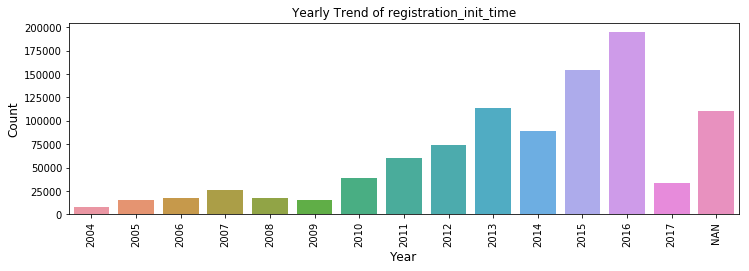

In [9]:
#registration_init_time yearly trend
training['registration_init_time_year'] = pd.DatetimeIndex(training['registration_init_time']).year
training['registration_init_time_year'] = training.registration_init_time_year.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
year_count=training['registration_init_time_year'].value_counts()

plt.figure(figsize=(12,12))
plt.subplot(311)
year_order = training['registration_init_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
year_order = sorted(year_order, key=lambda x: float(x))
sns.barplot(year_count.index, year_count.values,order=year_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Yearly Trend of registration_init_time", fontsize=12)
plt.show()
year_count_2 = Counter(training['registration_init_time_year']).most_common();

### Lets see how the year of registration influences the probability of churn:

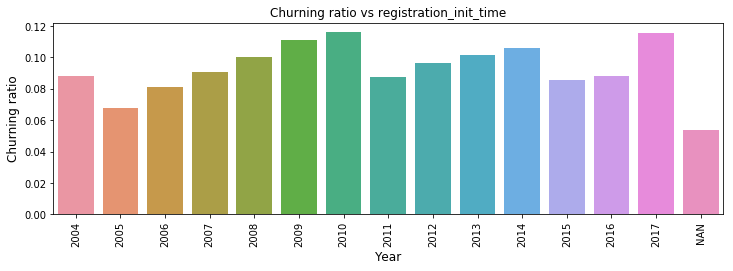

In [10]:
churn_mean_on_year = []
for y in year_order:
    current = training.loc[training['registration_init_time_year']==y]['is_churn'].mean()
    churn_mean_on_year.append(current)

plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(year_order, churn_mean_on_year,order=year_order)
plt.ylabel('Churning ratio', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churning ratio vs registration_init_time", fontsize=12)
plt.show()

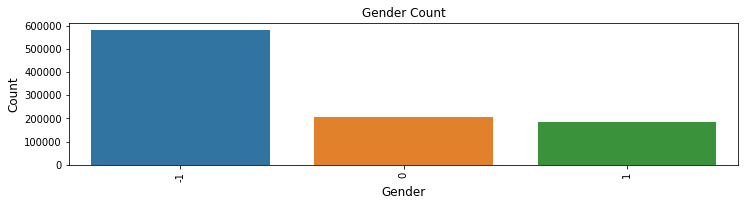

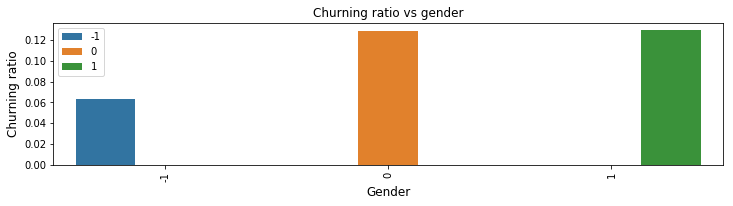

In [11]:
#Gender count
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="gender", data=training)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Gender Count", fontsize=12)
plt.show()
gender_count = Counter(training['gender']).most_common()

genders = []
churn_mean_on_gender = []
for (g, _) in gender_count:
    genders.append(g)
    churn_mean_on_gender.append(training.loc[training['gender']==g]['is_churn'].mean())

plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(genders, churn_mean_on_gender, genders)
plt.ylabel('Churning ratio', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churning ratio vs gender", fontsize=12)
plt.show();

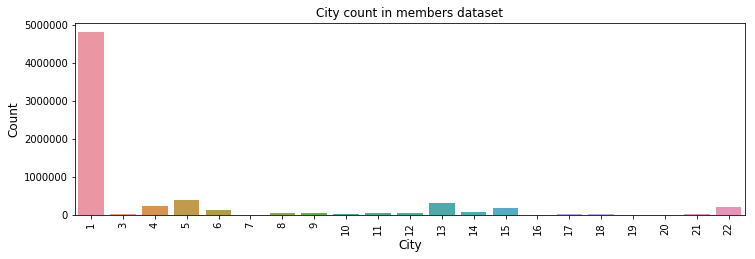

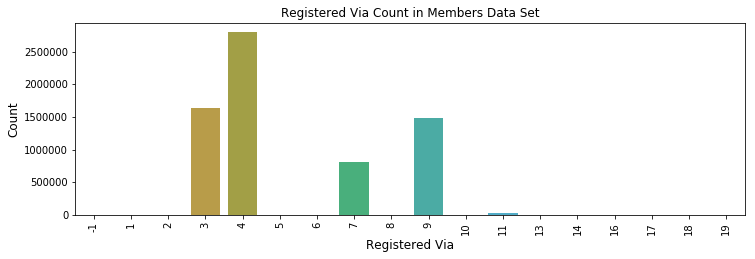

In [12]:
# City count in Members Data Set
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.countplot(x="city", data=members)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("City count in members dataset", fontsize=12)
plt.show()
city_count = Counter(members['city']).most_common()

#Registered Via Count in Members Data Set
plt.figure(figsize=(12,12))
plt.subplot(312)
sns.countplot(x="registered_via", data=members)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Registered Via Count in Members Data Set", fontsize=12)
plt.show()
RV_count = Counter(members['registered_via']).most_common();

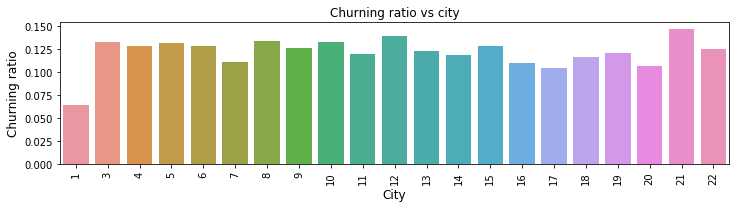

In [13]:
churn_mean_on_city = []
cities = []
for (city, count) in city_count:
    if count > 1000:
        current = training.loc[training['city']==city]['is_churn'].mean()
        churn_mean_on_city.append(current)
        cities.append(city)
        
plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(cities, churn_mean_on_city)
plt.ylabel('Churning ratio', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churning ratio vs city", fontsize=12)
plt.show()

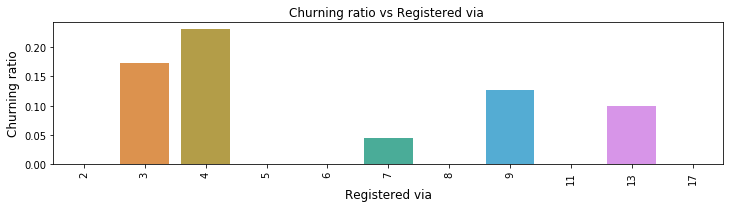

In [14]:
churn_mean_on_rv = []
rv = []
for (source, count) in RV_count:
    if count > 1000:
        current = training.loc[training['registered_via']==source]['is_churn'].mean()
        churn_mean_on_rv.append(current)
        rv.append(source)
        
plt.figure(figsize=(12,12)) 
plt.subplot(413)
sns.barplot(rv, churn_mean_on_rv)
plt.ylabel('Churning ratio', fontsize=12)
plt.xlabel('Registered via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churning ratio vs Registered via ", fontsize=12)
plt.show()

Lets try to fit a simple model to this first set of data and see what kind of results we get ! (this will enable us to have a reference for any other models)

In [15]:
training.head()

True


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_year
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,0,3,2013-12-23,2013
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,0,3,2013-12-23,2013
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,0,3,2013-12-27,2013
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,-1,-1,7,2014-01-09,2014
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,1,7,2014-01-25,2014


In [16]:
import time
training['registration_init_time'] = training.registration_init_time.apply(lambda x: time.mktime(x.timetuple()) if not type(x)==type('str') else 0.0)
training.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_year
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,0,3,1.387753e+09,2013
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,0,3,1.387753e+09,2013
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,0,3,1.388099e+09,2013
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,-1,-1,7,1.389222e+09,2014
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,1,7,1.390604e+09,2014


In [17]:
X = training.iloc[:, [2, 3, 4, 5, 6]].values
y = training.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("fitting model...")
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print("predicting...")
# Predicting the Test set results
y_pred = classifier.predict_proba(X_test)[:, 1]
y_pred_train = classifier.predict_proba(X_train)[:, 1]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train>0.5)
print("\nconfusion matrix on train: ")
print(cm_train)
cm_test = confusion_matrix(y_test, y_pred>0.5)
print("\nconfusion matrix on test: ")
print(cm_test)

from tools import log_loss
print("\nloss on train: ")
print(log_loss(y_train, y_pred_train))
print("\nloss on test: ")
print(log_loss(y_test, y_pred))

/home/raph/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


fitting model...
predicting...

confusion matrix on train: 
[[660516   2130]
 [ 32146  33428]]

confusion matrix on test: 
[[214702   6282]
 [ 20043   1713]]

loss on train: 
hello
0.150773630352

loss on test: 
hello
0.745036238414


### Now lets explore the transactions dataset:

In [18]:
transactions = pd.read_csv(path_to_data+"transactions_v2.csv")
transactions['transaction_date'] = transactions.transaction_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN")
transactions['membership_expire_date'] = transactions.membership_expire_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN")
transactions['payment_method_id'] = transactions.payment_method_id.apply(lambda x: int(x) if pd.notnull(x) else -1)
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0


In [19]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,1.000000e+00


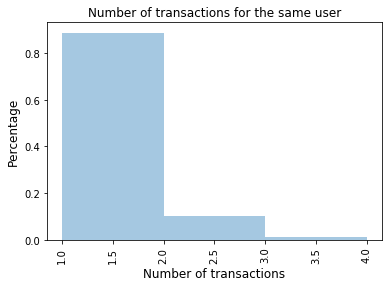

In [20]:
user_count = Counter(transactions['msno']).most_common()

counts = []
for _, count in user_count:
    counts.append(count)
    
bins = range(1, 5)

sns.distplot(counts[5000:],kde=False, norm_hist=True, bins=bins)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Number of transactions', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of transactions for the same user", fontsize=12)
plt.show()

### Lets comment this plot:
So there is in most cases a single transaction in the dataset for each user. This means that it might not be very helpful to look at the evolution of transactions for a user. What we might want to do is to keep only one transaction for each user and we are going to keep only the earliest transaction.

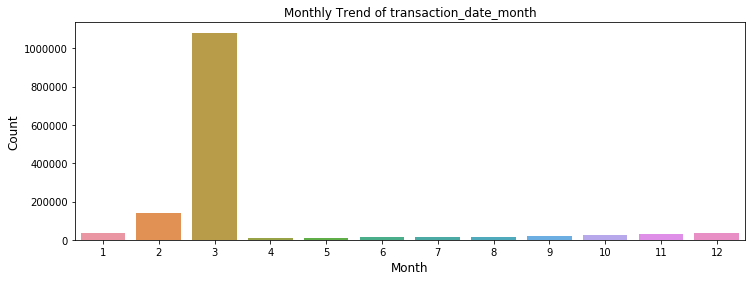

In [28]:
transactions['transaction_date_month'] = pd.DatetimeIndex(transactions['transaction_date']).month
transactions['transaction_date_month'] = transactions.transaction_date_month.apply(lambda x: int(x) if pd.notnull(x) else -1)
month_count=transactions['transaction_date_month'].value_counts()

plt.figure(figsize=(12,4))
month_order = transactions['transaction_date_month'].unique()
month_order=sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title("Monthly Trend of transaction_date_month", fontsize=12)
plt.show()
year_count_2 = Counter(transactions['transaction_date_month']).most_common();

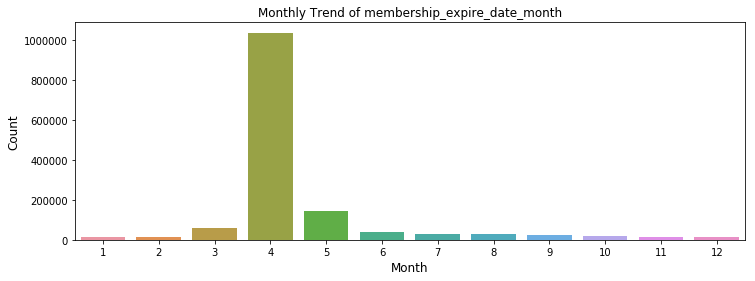

In [22]:
transactions['membership_expire_date_month'] = pd.DatetimeIndex(transactions['membership_expire_date']).month
transactions['membership_expire_date_month'] = transactions.membership_expire_date_month.apply(lambda x: int(x) if pd.notnull(x) else -1)
month_count=transactions['membership_expire_date_month'].value_counts()

plt.figure(figsize=(12,4))
month_order = transactions['membership_expire_date_month'].unique()
month_order=sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title("Monthly Trend of membership_expire_date_month", fontsize=12)
plt.show()
year_count_2 = Counter(transactions['membership_expire_date_month']).most_common()

In [29]:
# conversion en set augmente la vitesse de façon PHENOMENALE
id_set = set(training['msno'].values)
bins = np.array([1 if id_ in id_set else 0 for id_ in transactions['msno']])
# quel pourcentage des transactions fait partie du training ?
print(np.mean(bins))

0.791075388065


### Il est temps de loader la base de test

In [24]:
test = pd.read_csv(path_to_data+"sample_submission_v2.csv")
test.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [25]:
test.describe()

,is_churn
count,907471.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [26]:
id_set = set(test['msno'].values)
bins = np.array([1 if id_ in id_set else 0 for id_ in transactions['msno']])
# quel pourcentage des transactions fait partie du test ?
print(np.mean(bins))

0.680138280053


In [27]:
id_set = set(training['msno'].values)
bins = np.array([1 if id_ in id_set else 0 for id_ in test['msno']])
# quel pourcentage des données de test sont dans le fichier de train ?
print(np.mean(bins))

0.883212796883


Donc 88% des données de test sont dans le fichier de train. C'est très bizarre du coup. Mais bon comme on essaye de prédire un évènement nouveau ça peut avoir du sens. Ce que je comprends pas c'est surtout pourquoi il y a si peu de transactions... En moyenne les gens reprennent l'abonnement pour deux mois donc ça peut expliquer qu'il y ait moins de transactions.

un kernel pas mal:
https://www.kaggle.com/the1owl/regressing-during-insomnia-0-21496
Il fait un apprentissage assez bourin et il arrive à un score pas trop mal. Ce qui est intéressant c'est surtout les features qu'il utilise.

Un autre kernel qui fait un peu de memory reduction ce qui pourrait faire du bien:
https://www.kaggle.com/jeru666/did-you-think-of-these-features
